In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../benchmark/benchmark_dili_tdc_trf_result.csv')

In [4]:
df

,Dataset,Percent_Activity_Cliff_train,Percent_Activity_Cliff_test,Molecular_network_Fingeprint,Model_Fingeprint,Topological_Random_Forest_Accuracy,Topological_Random_Forest_Precision,Topological_Random_Forest_Recall,Topological_Random_Forest_Balanced_Accuracy,Topological_Random_Forest_F1_Score,Topological_Random_Forest_AUC_ROC,Random_Forest_Accuracy,Random_Forest_Precision,Random_Forest_Recall,Random_Forest_Balanced_Accuracy,Random_Forest_F1_Score,Random_Forest_AUC_ROC
0,dili,35.483471,40.166742,rdkit,rdkit,0.812500,0.742424,0.98,0.805217,0.844828,0.805217,0.802083,0.738462,0.96,0.795217,0.834783,0.795217
1,dili,40.628674,42.902878,maccs,rdkit,0.812500,0.750000,0.96,0.806087,0.842105,0.806087,0.802083,0.738462,0.96,0.795217,0.834783,0.795217
2,dili,9.151028,4.333781,morgan2,rdkit,0.802083,0.738462,0.96,0.795217,0.834783,0.795217,0.802083,0.738462,0.96,0.795217,0.834783,0.795217
3,dili,10.401318,6.184340,morgan3,rdkit,0.812500,0.750000,0.96,0.806087,0.842105,0.806087,0.802083,0.738462,0.96,0.795217,0.834783,0.795217
4,dili,35.483471,40.166742,rdkit,maccs,0.770833,0.741379,0.86,0.766957,0.796296,0.766957,0.833333,0.793103,0.92,0.829565,0.851852,0.829565
5,dili,40.628674,42.902878,maccs,maccs,0.781250,0.754386,0.86,0.777826,0.803738,0.777826,0.833333,0.793103,0.92,0.829565,0.851852,0.829565
6,dili,9.151028,4.333781,morgan2,maccs,0.802083,0.771930,0.88,0.798696,0.822430,0.798696,0.833333,0.793103,0.92,0.829565,0.851852,0.829565
7,dili,10.401318,6.184340,morgan3,maccs,0.791667,0.758621,0.88,0.787826,0.814815,0.787826,0.833333,0.793103,0.92,0.829565,0.851852,0.829565
8,dili,35.483471,40.166742,rdkit,morgan2,0.708333,0.823529,0.56,0.714783,0.666667,0.714783,0.760417,0.754717,0.80,0.758696,0.776699,0.758696
9,dili,40.628674,42.902878,maccs,morgan2,0.729167,0.833333,0.60,0.734783,0.697674,0.734783,0.760417,0.754717,0.80,0.758696,0.776699,0.758696


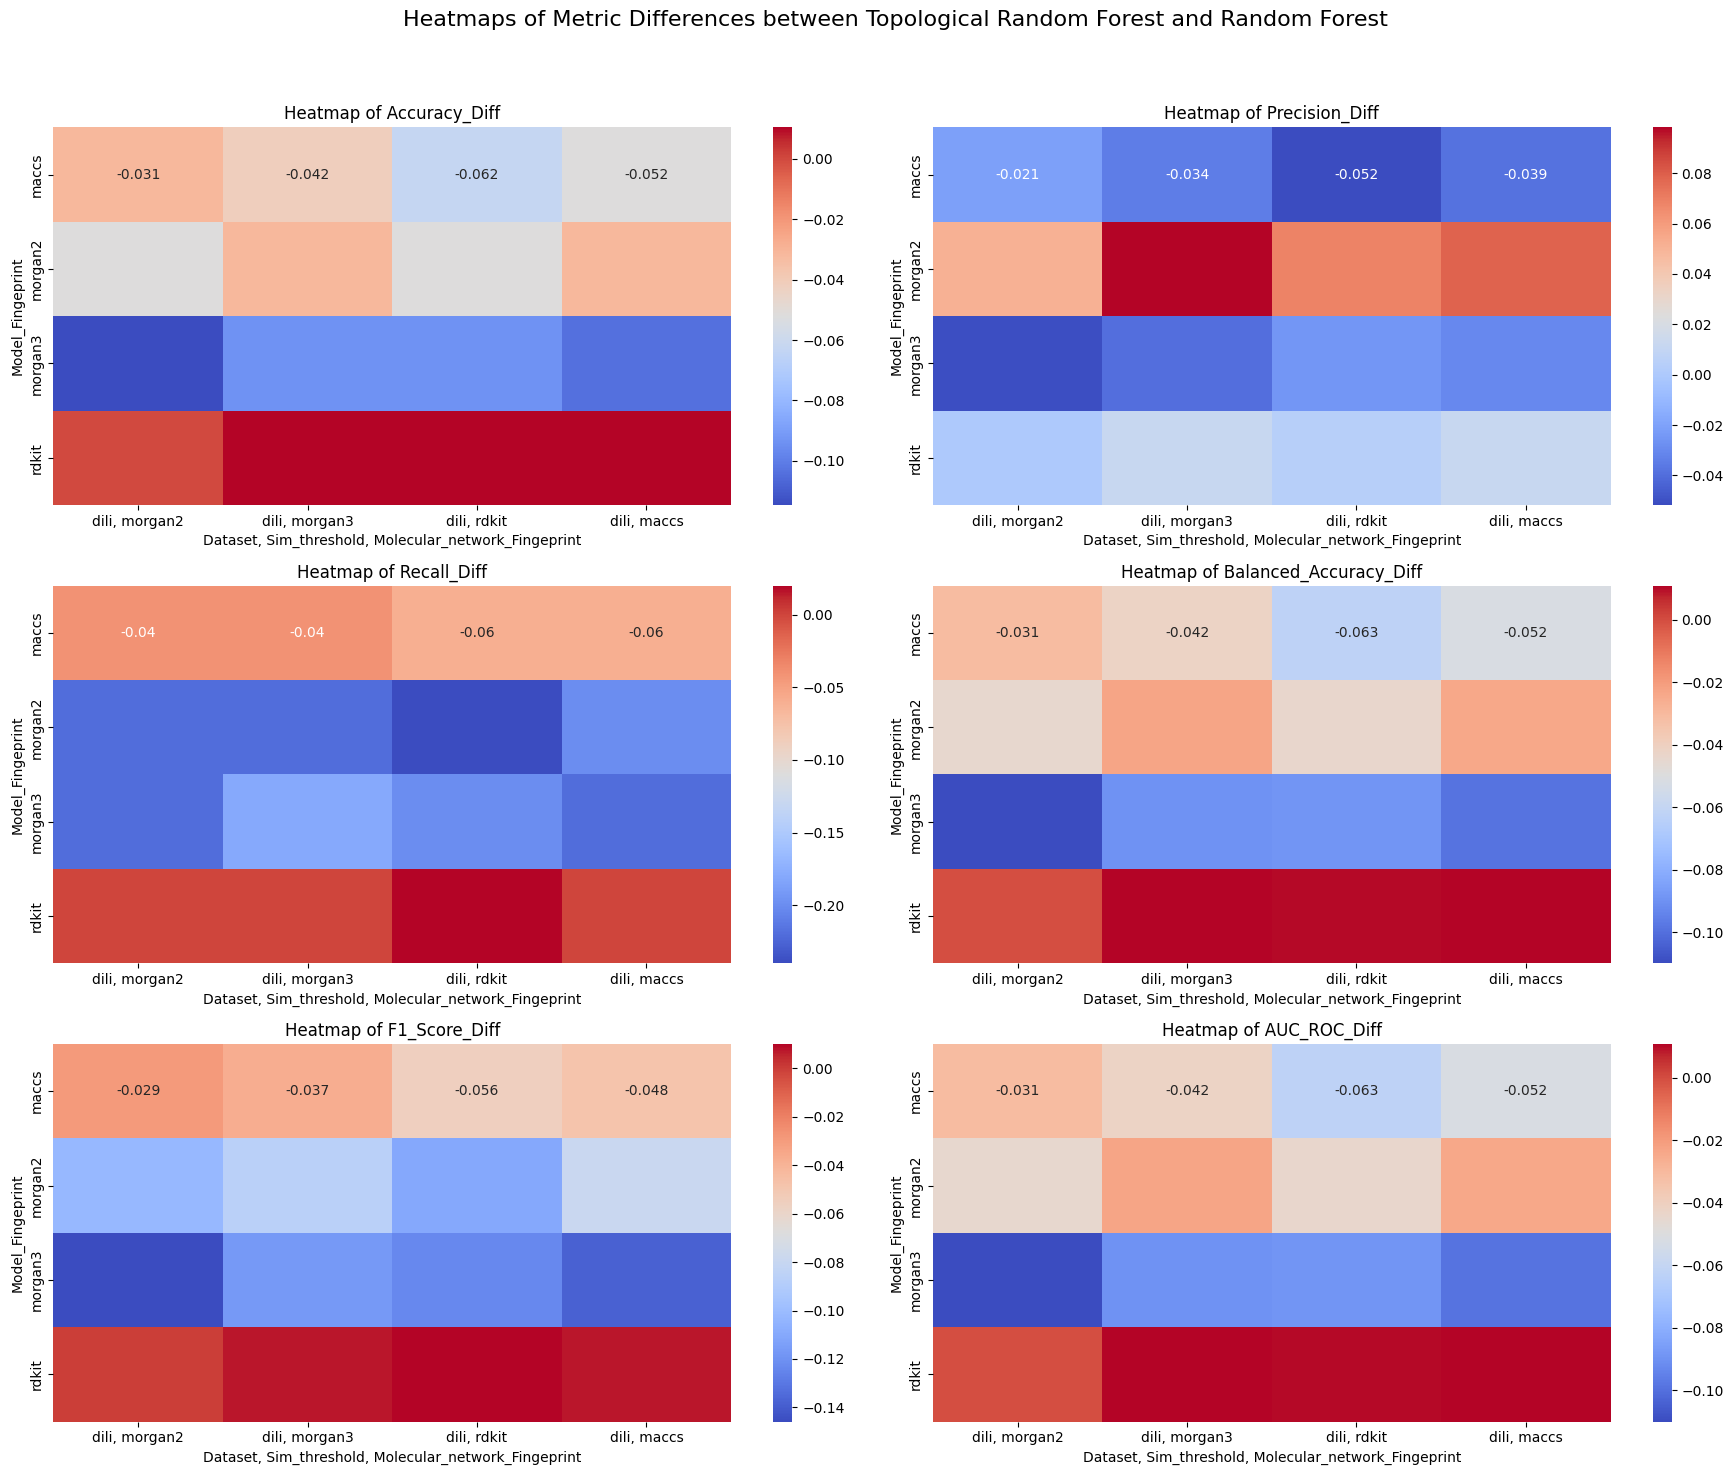

In [7]:
df['Accuracy_Diff'] = df['Topological_Random_Forest_Accuracy'] - df['Random_Forest_Accuracy']
df['Precision_Diff'] = df['Topological_Random_Forest_Precision'] - df['Random_Forest_Precision']
df['Recall_Diff'] = df['Topological_Random_Forest_Recall'] - df['Random_Forest_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Random_Forest_Balanced_Accuracy'] - df['Random_Forest_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Random_Forest_F1_Score'] - df['Random_Forest_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Random_Forest_AUC_ROC'] - df['Random_Forest_AUC_ROC']

# List of metric differences to plot
metrics = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Sort the DataFrame by Percent_Activity_Cliff_test
df_sorted = df.sort_values(by='Percent_Activity_Cliff_test')

# Create a combined column for sorting
df_sorted['Combined'] = df_sorted['Dataset'] + ', ' + df_sorted['Molecular_network_Fingeprint']

# Group the data by the relevant columns and calculate mean differences
grouped = df_sorted.groupby(['Dataset', 'Molecular_network_Fingeprint', 'Model_Fingeprint', 'Combined']).mean().reset_index()

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.suptitle('Heatmaps of Metric Differences between Topological Random Forest and Random Forest', fontsize=16)

# Get the sorted combined column order
sorted_combined_order = grouped.sort_values(by='Percent_Activity_Cliff_test')['Combined'].unique()

# Iterate over metrics and axes
for i, metric in enumerate(metrics):
    # Determine row and column index
    row = i // 2
    col = i % 2
    
    # Create a pivot table for the heatmap, following the sorted order
    pivot_table = grouped.pivot_table(index='Model_Fingeprint', columns='Combined', values=metric)
    pivot_table = pivot_table[sorted_combined_order]  # Ensure columns are sorted

    # Plot the heatmap on the corresponding subplot
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f'Heatmap of {metric}')
    axes[row, col].set_xlabel('Dataset, Sim_threshold, Molecular_network_Fingeprint')
    axes[row, col].set_ylabel('Model_Fingeprint')

# Adjust layout for better viewing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# List of metrics differences
metrics_diff = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Dictionary to store t-test results
ttest_results = {}

# Perform paired t-tests for each metric
for metric in metrics_diff:
    t_stat, p_value = ttest_rel(df[f'Topological_Decision_Tree_{metric[:-5]}'], df[f'Decision_Tree_{metric[:-5]}'])
    ttest_results[metric[:-5]] = {'t_stat': t_stat, 'p_value': p_value}

# Create a DataFrame to display the results
ttest_results_df = pd.DataFrame(ttest_results).T
ttest_results_df['Significant'] = ttest_results_df['p_value'] < 0.05

print(ttest_results_df)

                     t_stat   p_value  Significant
Accuracy           1.508837  0.136339        False
Precision          0.291669  0.771498        False
Recall             3.363290  0.001314         True
Balanced_Accuracy  1.311866  0.194326        False
F1_Score           2.638737  0.010473         True
AUC_ROC            1.311866  0.194326        False


In [ ]:
from scipy.stats import wilcoxon

# Dictionary to store Wilcoxon test results
wilcoxon_results = {}

# Perform Wilcoxon signed-rank tests for each metric
for metric in metrics_diff:
    stat, p_value = wilcoxon(df[f'Topological_Decision_Tree_{metric[:-5]}'], df[f'Decision_Tree_{metric[:-5]}'])
    wilcoxon_results[metric[:-5]] = {'stat': stat, 'p_value': p_value}

# Create a DataFrame to display the results
wilcoxon_results_df = pd.DataFrame(wilcoxon_results).T
wilcoxon_results_df['Significant'] = wilcoxon_results_df['p_value'] < 0.05

print("Wilcoxon Signed-Rank Test Results")
print(wilcoxon_results_df)


Wilcoxon Signed-Rank Test Results
                     stat   p_value  Significant
Accuracy            796.5  0.145820        False
Precision          1022.0  0.904131        False
Recall              232.0  0.001230         True
Balanced_Accuracy   818.0  0.136921        False
F1_Score            620.0  0.004948         True
AUC_ROC             820.0  0.140484        False


In [ ]:
from statsmodels.stats.descriptivestats import sign_test

# Dictionary to store Sign test results
sign_test_results = {}

# Perform Sign tests for each metric
for metric in metrics_diff:
    stat, p_value = sign_test(df[f'Topological_Decision_Tree_{metric[:-5]}'], df[f'Decision_Tree_{metric[:-5]}'])
    sign_test_results[metric[:-5]] = {'stat': stat, 'p_value': p_value}

# Create a DataFrame to display the results
sign_test_results_df = pd.DataFrame(sign_test_results).T
sign_test_results_df['Significant'] = sign_test_results_df['p_value'] < 0.05

print("Sign Test Results")
print(sign_test_results_df)


Sign Test Results
                   stat   p_value  Significant
Accuracy            7.5  0.076926        False
Precision           2.0  0.707981        False
Recall              8.5  0.016094         True
Balanced_Accuracy   7.0  0.103422        False
F1_Score            8.0  0.059941        False
AUC_ROC             7.0  0.103422        False


In [ ]:
from mlxtend.evaluate import permutation_test

# Dictionary to store Permutation test results
permutation_test_results = {}

# Perform Permutation tests for each metric
for metric in metrics_diff:
    p_value = permutation_test(df[f'Topological_Decision_Tree_{metric[:-5]}'], df[f'Decision_Tree_{metric[:-5]}'], method='approximate', num_rounds=10000, seed=42)
    permutation_test_results[metric[:-5]] = {'p_value': p_value}

# Create a DataFrame to display the results
permutation_test_results_df = pd.DataFrame(permutation_test_results).T
permutation_test_results_df['Significant'] = permutation_test_results_df['p_value'] < 0.05

print("Permutation Test Results")
print(permutation_test_results_df)


Permutation Test Results
                    p_value  Significant
Accuracy           0.336266        False
Precision          0.835816        False
Recall             0.005299         True
Balanced_Accuracy  0.389661        False
F1_Score           0.067893        False
AUC_ROC            0.389661        False


In [ ]:
# Combine results from all tests
all_tests_df = pd.concat([ttest_results_df, wilcoxon_results_df, sign_test_results_df, permutation_test_results_df], 
                         keys=['t-test', 'Wilcoxon', 'Sign Test', 'Permutation Test'], 
                         names=['Test', 'Metric'])
print("Summary of All Test Results")
all_tests_df


Summary of All Test Results


t_stat   p_value  Significant    stat
Test             Metric                                                    
t-test           Accuracy           1.508837  0.136339        False     NaN
                 Precision          0.291669  0.771498        False     NaN
                 Recall             3.363290  0.001314         True     NaN
                 Balanced_Accuracy  1.311866  0.194326        False     NaN
                 F1_Score           2.638737  0.010473         True     NaN
                 AUC_ROC            1.311866  0.194326        False     NaN
Wilcoxon         Accuracy                NaN  0.145820        False   796.5
                 Precision               NaN  0.904131        False  1022.0
                 Recall                  NaN  0.001230         True   232.0
                 Balanced_Accuracy       NaN  0.136921        False   818.0
                 F1_Score                NaN  0.004948         True   620.0
                 AUC_ROC                 NaN  0.140484        False   820.0
Sign Test        Accuracy                NaN  0.076926        False     7.5
                 Precision               NaN  0.707981        False     2.0
                 Recall                  NaN  0.016094         True     8.5
                 Balanced_Accuracy       NaN  0.103422        False     7.0
                 F1_Score                NaN  0.059941        False     8.0
                 AUC_ROC                 NaN  0.103422        False     7.0
Permutation Test Accuracy                NaN  0.336266        False     NaN
                 Precision               NaN  0.835816        False     NaN
                 Recall                  NaN  0.005299         True     NaN
                 Balanced_Accuracy       NaN  0.389661        False     NaN
                 F1_Score                NaN  0.067893        False     NaN
                 AUC_ROC                 NaN  0.389661        False     NaN

/var/folders/nj/v2qpgqmx5v95v_p1dzfj62yr0000gn/T/ipykernel_46659/3709199775.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
/var/folders/nj/v2qpgqmx5v95v_p1dzfj62yr0000gn/T/ipykernel_46659/3709199775.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


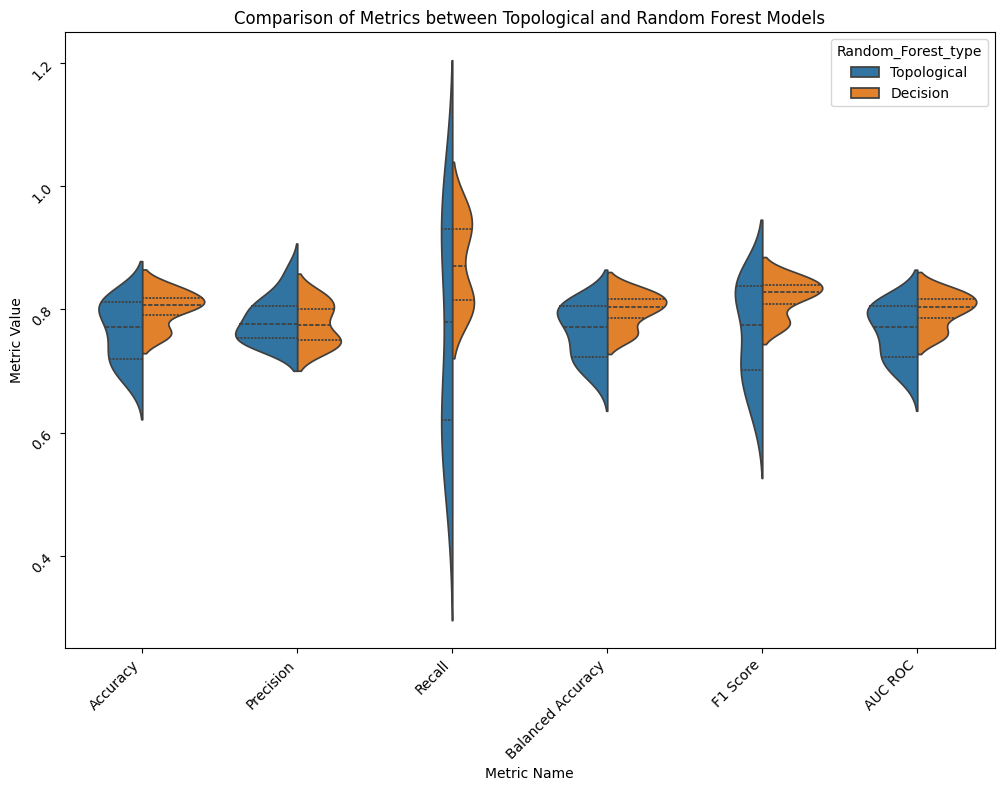

In [20]:
# Define metrics to melt
metrics = [
    "Topological_Random_Forest_Accuracy", "Random_Forest_Accuracy",
    "Topological_Random_Forest_Precision", "Random_Forest_Precision",
    "Topological_Random_Forest_Recall", "Random_Forest_Recall",
    "Topological_Random_Forest_Balanced_Accuracy", "Random_Forest_Balanced_Accuracy",
    "Topological_Random_Forest_F1_Score", "Random_Forest_F1_Score",
    "Topological_Random_Forest_AUC_ROC", "Random_Forest_AUC_ROC"
]

# Melt the DataFrame to create a DataFrame with metric types and values
df_melted = df.melt(id_vars=['Dataset', 'Molecular_network_Fingeprint', 'Model_Fingeprint'],
                    value_vars=metrics,
                    var_name='metric_type',
                    value_name='value')

# Extract the decision tree type (Topological or Decision) and metric name from the metric type
df_melted['Random_Forest_type'] = df_melted['metric_type'].apply(lambda x: 'Topological' if 'Topological' in x else 'Decision')
df_melted['metric_name'] = df_melted['metric_type'].apply(lambda x: x.replace("Topological_Random_Forest_", "").replace("Random_Forest_", "").replace("_", " "))

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a violin plot comparing the distributions of each metric for "Topological Decision Tree" and "Decision Tree"
ax = sns.violinplot(data=df_melted, x='metric_name', y='value', hue='Random_Forest_type', split=True, inner='quartile')

# Set y-tick labels rotation (optional, you can adjust the angle as needed)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Set x-tick labels to remove underscores and rotate for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set title and labels
plt.title('Comparison of Metrics between Topological and Random Forest Models')
plt.xlabel('Metric Name')
plt.ylabel('Metric Value')

# Show the plot
plt.show()

# Visualising Topological impurity reduction in practice

In [5]:
import os
from joblib import load
os.chdir('../benchmark')

In [6]:
clf = load("./dili.joblib")

In [7]:
clf

{'split_feature': 650,
 'split_value': 0,
 'left': {'split_feature': 1855,
  'split_value': 0,
  'left': {'split_feature': 1363,
   'split_value': 0,
   'left': {'split_feature': 97,
    'split_value': 0,
    'left': {'split_feature': 932,
     'split_value': 0,
     'left': {'split_feature': 321,
      'split_value': 0,
      'left': {'split_feature': 1707,
       'split_value': 0,
       'left': {'split_feature': 20,
        'split_value': 0,
        'left': {'split_feature': 23,
         'split_value': 0,
         'left': {'split_feature': 36,
          'split_value': 0,
          'left': {'split_feature': 165,
           'split_value': 0,
           'left': {'split_feature': 524,
            'split_value': 0,
            'left': {'leaf': True,
             'class': 0,
             'topological_impurity': 0.0,
             'P_active': 0.0},
            'right': {'leaf': True,
             'class': 1,
             'topological_impurity': 0.0,
             'P_active': 1.0},
          

# Draw the Decision Tree as Image

In [8]:
import pydot

def plot_binary_decision_tree(tree_dict):
    def add_node_and_edges(graph, node, node_id):
        # Create the current node in the graph
        if 'leaf' in node:
            # Leaf node
            label = f"class: {node['class']}\nimpurity: {node['topological_impurity']:.2f}\nP_active: {node['P_active']}"
            graph.add_node(pydot.Node(node_id, label=label, shape='ellipse', style='filled', fillcolor='lightblue'))
        else:
            # Decision node
            label = f"split_feature: {node['split_feature']}\nsplit_value: {node['split_value']}\nP_active: {node['P_active']}\nimpurity: {node['topological_impurity']:.2f}"
            graph.add_node(pydot.Node(node_id, label=label, shape='box'))

            # Recur on left and right children
            left_node_id = f"{node_id}_left"
            right_node_id = f"{node_id}_right"
            
            # Add left and right child nodes
            add_node_and_edges(graph, node['left'], left_node_id)
            add_node_and_edges(graph, node['right'], right_node_id)
            
            # Add edges from current node to left and right children
            graph.add_edge(pydot.Edge(node_id, left_node_id, label='left'))
            graph.add_edge(pydot.Edge(node_id, right_node_id, label='right'))
    
    # Create a graph
    graph = pydot.Dot(graph_type='digraph')

    # Start adding nodes and edges from the root
    add_node_and_edges(graph, tree_dict, "root")
    
    # Display the graph
    graph.write_png('../dt.png')
    print("Decision tree plotted and saved as 'binary_decision_tree.png'.")

# Plot the binary decision tree
plot_binary_decision_tree(clf)

Decision tree plotted and saved as 'binary_decision_tree.png'.
